In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor


In [2]:
df = pd.read_csv("df.csv")
df_1 = pd.read_csv("df_1.csv")
df_1.head()

,host_response_rate,host_acceptance_rate,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,98.0,52.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,195.0,...,10.0,10.0,10.0,10.0,10.0,8.0,0.0,0.0,24.0,0.0
1,100.0,100.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,150.0,...,9.0,9.0,10.0,9.0,10.0,9.0,0.0,0.0,1.0,0.0
2,97.0,100.0,0.0,0.0,6.0,1.0,2.0,3.0,0.0,140.0,...,8.0,8.0,9.0,9.0,9.0,9.0,0.0,0.0,3.0,1.0
3,92.0,100.0,0.0,0.0,3.0,1.0,1.0,2.0,0.0,110.0,...,9.0,8.0,8.0,8.0,9.0,9.0,0.0,1.0,4.0,4.0
4,100.0,75.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,119.0,...,9.0,9.0,10.0,10.0,8.0,9.0,0.0,2.0,3.0,0.0


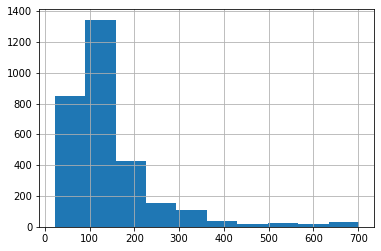

In [4]:
df_1.price.hist()

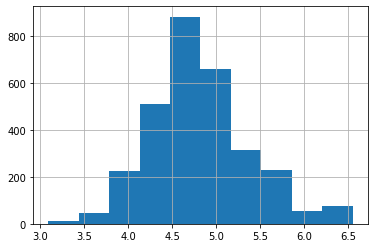

In [5]:
np.log(df_1.price).hist()

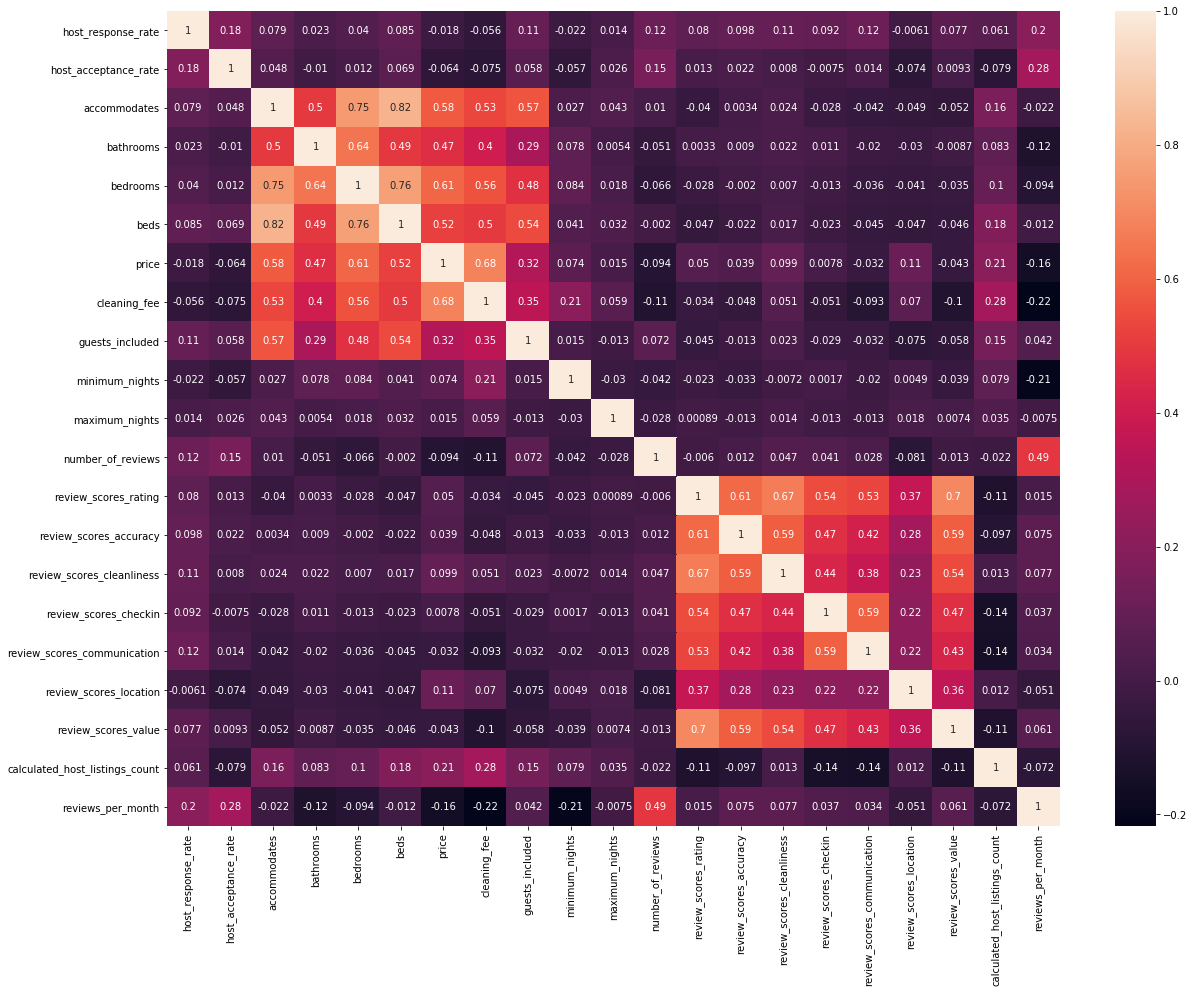

In [114]:
corrmat = df_1[df._get_numeric_data().columns].corr().round(7)
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True)
plt.show()

In [3]:
df_1.price=np.log(df_1.price)

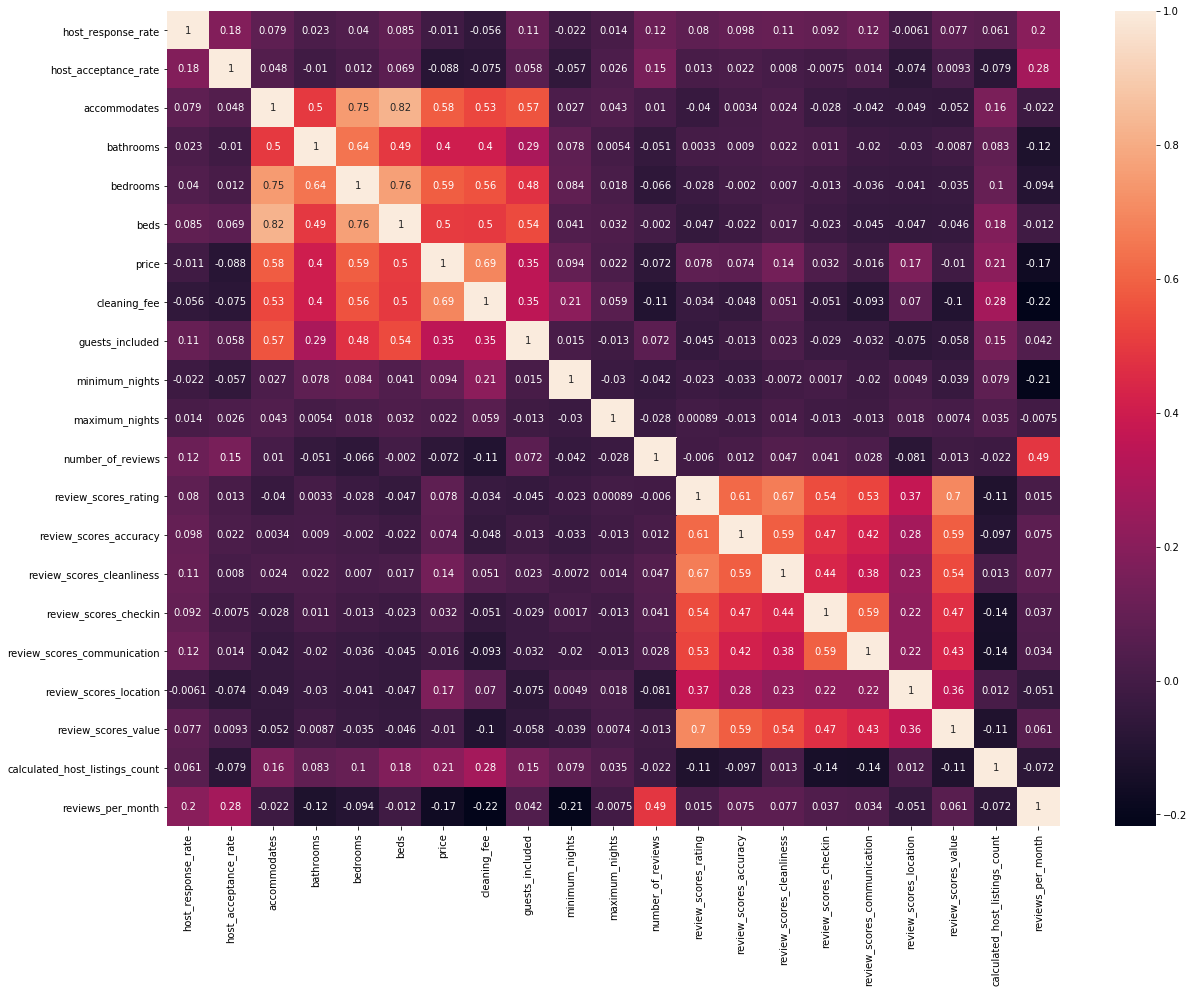

In [116]:
corrmat = df_1[df._get_numeric_data().columns].corr().round(7)
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True)
plt.show()

In [4]:
train, test = train_test_split(df_1, test_size=0.2, random_state=0)
X_train = train.drop('price', axis=1)
X_test = test.drop('price', axis=1)
y_train = train.price
y_test = test.price

In [5]:
def metrics(X_train, X_test, y_train, y_test, y_pred, model):
    MSE = [mean_squared_error(np.exp(y_train), np.exp(model.predict(X_train))), mean_squared_error(np.exp(y_test), np.exp(y_pred))]
    RMSE = [np.sqrt(mean_squared_error(np.exp(y_train), np.exp(model.predict(X_train)))),np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))]
    R2 = [model.score(X_train, y_train), model.score(X_test, y_test)]
    results = {'MSE': MSE, 'RMSE': RMSE, 'R2':R2}
    return pd.DataFrame(results, index=['Train', 'Test'])

def visualising(X_train, X_test, y_train, y_test, y_pred, model):
    ### Training set ### 
    plt.scatter(X_train[['cleaning_fee']], np.exp(y_train), color = 'red')
    plt.plot(X_train[['cleaning_fee']], np.exp(model.predict(X_train)), 'bo')
    plt.title('Price vs Cleaning Fee (Training set)')
    plt.xlabel('Cleaning Fee')
    plt.ylabel('Price')
    plt.show()
    
    ### Test set ### 
    plt.scatter(X_test[['cleaning_fee']], np.exp(y_test), color = 'red')
    plt.plot(X_test[['cleaning_fee']], np.exp(y_pred), 'bo')
    plt.title('Price vs Cleaning Fee (Test set)')
    plt.xlabel('Cleaning Fee')
    plt.ylabel('Price')
    plt.show()


In [6]:
#Простая линейная модель
sr = LinearRegression().fit(X_train[['cleaning_fee']], y_train)
sr.coef_, sr.intercept_

(array([0.00986901]), 4.233873323813589)

In [7]:
sr_y_pred = sr.predict(X_test[['cleaning_fee']])
metrics(X_train[['cleaning_fee']], X_test[['cleaning_fee']], y_train, y_test, sr_y_pred, sr).round(2)

,MSE,RMSE,R2
Train,8079.70,89.89,0.47
Test,7209.08,84.91,0.50


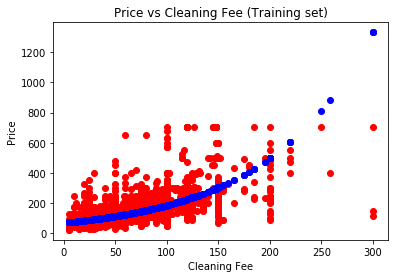

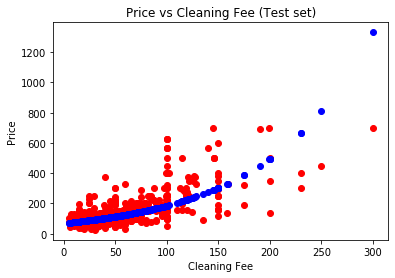

In [8]:
visualising(X_train[['cleaning_fee']], X_test[['cleaning_fee']], y_train, y_test, sr_y_pred, sr)

In [21]:
#Множественная линейная модель
mr = LinearRegression().fit(X_train, y_train)
mr.coef_, mr.intercept_


(array([-3.45016698e-05, -1.14908332e-03,  1.88295021e-03, -2.60054244e-01,
         5.48512407e-02,  6.59196567e-02,  1.30767479e-01, -2.62933610e-02,
        -1.44871846e-02,  5.60318892e-03, -1.10618154e-02, -2.14437501e-02,
        -1.73137759e-06,  3.11338517e-04,  4.42908169e-03,  2.35517846e-02,
         5.25342814e-02,  2.77232869e-02, -3.60468591e-02,  9.65892091e-02,
        -8.27273031e-02, -1.61492511e-02,  2.71562763e-02,  5.70292954e-03,
        -1.40834593e-02]),
 3.1498510117060357)

In [41]:
mr_y_pred = mr.predict(X_test)
metrics(X_train, X_test, y_train, y_test, mr_y_pred, mr).round(2)

,MSE,RMSE,R2
Train,5360.79,73.22,0.64
Test,5395.73,73.46,0.68


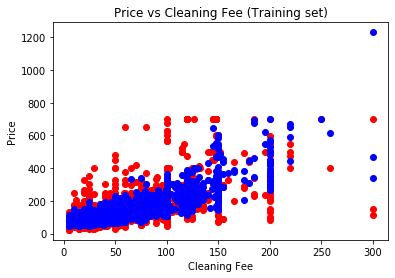

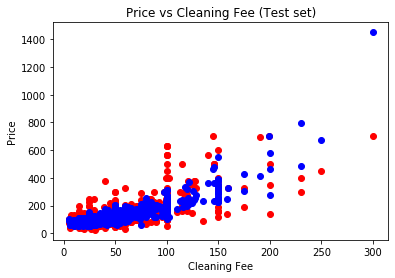

In [23]:
visualising(X_train, X_test, y_train, y_test, mr_y_pred, mr)

In [24]:
X_train_p = PolynomialFeatures().fit_transform(X_train[['accommodates', 'bedrooms', 'cleaning_fee']])
X_train_p = pd.DataFrame(X_train_p, columns= ['intercept', 'accommodates', 'bedrooms', 'cleaning_fee', 
                                              'accommodates^2', 'bedrooms^2', 'cleaning_fee^2',
                                             'accommodates*bedrooms', 'accommodates*cleaning_fee', 'bedrooms*cleaning_fee'])
X_test_p = PolynomialFeatures().fit_transform(X_test[['accommodates', 'bedrooms', 'cleaning_fee']])
X_test_p = pd.DataFrame(X_test_p, columns= ['intercept', 'accommodates', 'bedrooms', 'cleaning_fee', 
                                              'accommodates^2', 'bedrooms^2', 'cleaning_fee^2',
                                             'accommodates*bedrooms', 'accommodates*cleaning_fee', 'bedrooms*cleaning_fee'])
pr = LinearRegression().fit(X_train_p, y_train)
pr_y_pred = pr.predict(X_test_p)


In [25]:
metrics(X_train_p, X_test_p, y_train, y_test, pr_y_pred, pr).round(2)

,MSE,RMSE,R2
Train,5423.06,73.64,0.59
Test,5005.85,70.75,0.60


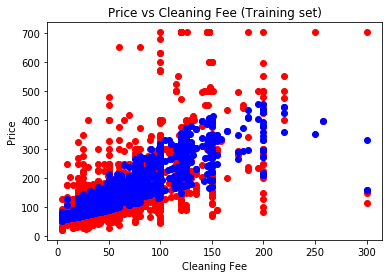

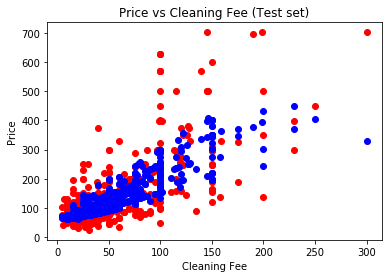

In [26]:
visualising(X_train_p, X_test_p, y_train, y_test, pr_y_pred, pr)

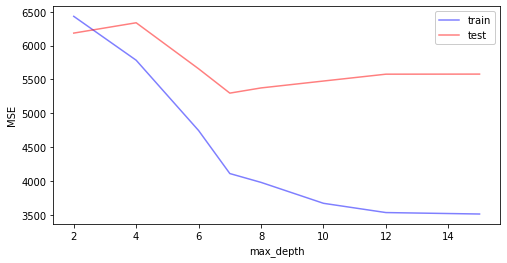

In [28]:
def max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeRegressor(max_depth = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(np.exp(y_train), np.exp(rf.predict(X_train))))
        mse_test.append(mean_squared_error(np.exp(y_test), np.exp(rf.predict(X_test))))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

    
max_depth(X_train[['cleaning_fee']], X_test[['cleaning_fee']], y_train, y_test, [2, 4, 6, 7, 8, 10, 12, 15])

In [29]:
# Дерево решений с 1 фактором
sdt = DecisionTreeRegressor(max_depth = 7, random_state=10).fit(X_train[['cleaning_fee']], y_train)
sdt_y_pred = sdt.predict(X_test[['cleaning_fee']])
metrics(X_train[['cleaning_fee']], X_test[['cleaning_fee']], y_train, y_test, sdt_y_pred, sdt).round(2)

,MSE,RMSE,R2
Train,4110.15,64.11,0.62
Test,5298.29,72.79,0.58


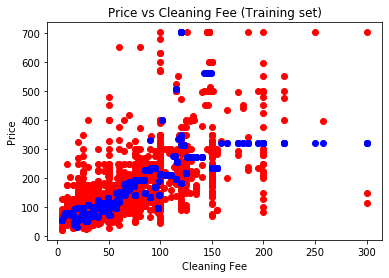

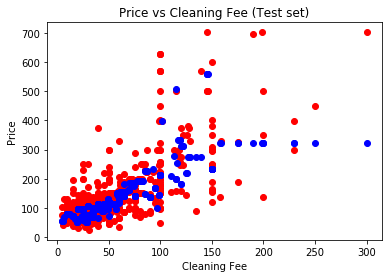

In [155]:
visualising(X_train[['cleaning_fee']], X_test[['cleaning_fee']], y_train, y_test, sdt_y_pred, sdt)

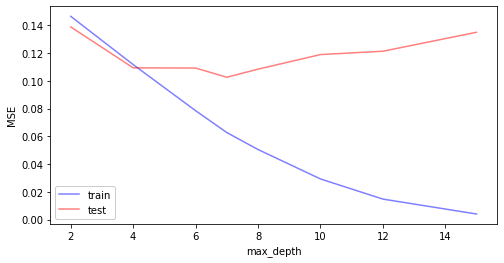

In [156]:
max_depth(X_train, X_test, y_train, y_test, [2, 4, 6, 7, 8, 10, 12, 15])

In [27]:
# Дерево решений со всеми факторами
dt = DecisionTreeRegressor(max_depth = 7, random_state=10).fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
metrics(X_train, X_test, y_train, y_test, dt_y_pred, dt).round(2)

,MSE,RMSE,R2
Train,1722.53,41.50,0.80
Test,3670.94,60.59,0.68


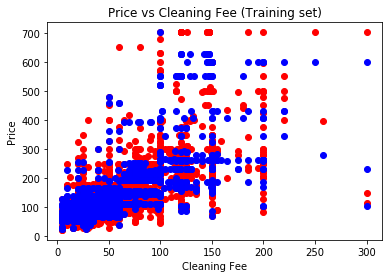

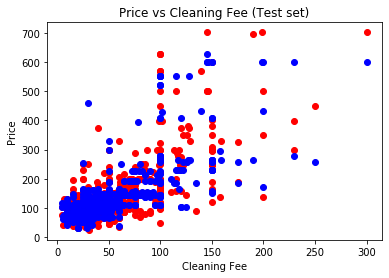

In [158]:
visualising(X_train, X_test, y_train, y_test, dt_y_pred, dt)

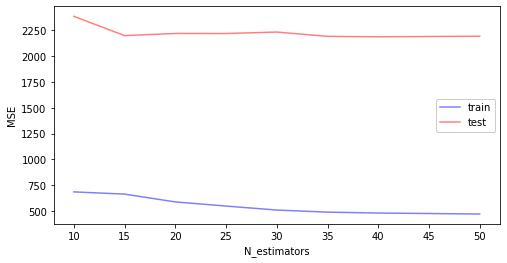

In [29]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(np.exp(y_train), np.exp(rf.predict(X_train))))
        mse_test.append(mean_squared_error(np.exp(y_test), np.exp(rf.predict(X_test))))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")
    ax.legend(framealpha=1, frameon=True);

    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [10, 15, 20, 25, 30, 35, 40, 50])

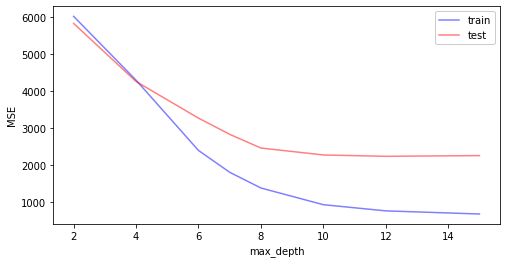

In [36]:
def rf_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=15, max_depth =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(np.exp(y_train), np.exp(rf.predict(X_train))))
        mse_test.append(mean_squared_error(np.exp(y_test), np.exp(rf.predict(X_test))))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

    
rf_max_depth(X_train, X_test, y_train, y_test, [2, 4, 6, 7, 8, 10, 12, 15])

In [32]:
# Случайный лес
rf = RandomForestRegressor(n_estimators = 15, max_depth = 8, random_state = 10).fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
metrics(X_train, X_test, y_train, y_test, rf_y_pred, rf).round(2)

,MSE,RMSE,R2
Train,1377.03,37.11,0.86
Test,2456.20,49.56,0.76


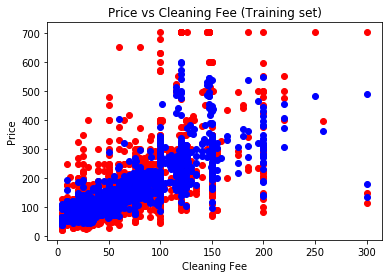

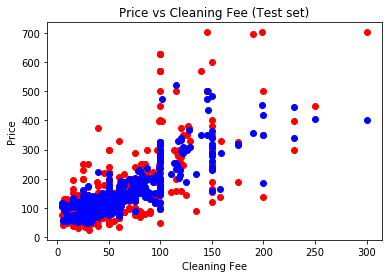

In [165]:
visualising(X_train, X_test, y_train, y_test, rf_y_pred, rf)

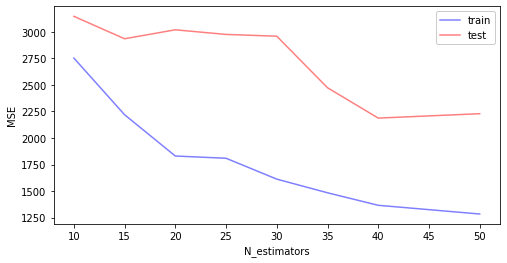

In [33]:
def catboost_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostRegressor(iterations=i, random_state=10, eval_metric='RMSE', loss_function='RMSE').fit(X_train, y_train,
                                                                                                                 eval_set=(X_test, y_test),
                                                                                                                  logging_level='Silent')
        mse_train.append(mean_squared_error(np.exp(y_train), np.exp(catboost.predict(X_train))))
        mse_test.append(mean_squared_error(np.exp(y_test), np.exp(catboost.predict(X_test))))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")
    ax.legend(framealpha=1, frameon=True);

    
catboost_best_n_estimator(X_train, X_test, y_train, y_test, [10, 15, 20, 25, 30, 35, 40, 50])



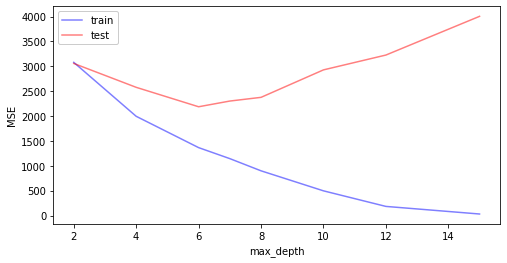

In [37]:
def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostRegressor(iterations=40, max_depth=i, random_state=10, eval_metric='RMSE', loss_function='RMSE').fit(X_train, y_train,
                                                                                                                 eval_set=(X_test, y_test),
                                                                                                                  logging_level='Silent')
        mse_train.append(mean_squared_error(np.exp(y_train), np.exp(catboost.predict(X_train))))
        mse_test.append(mean_squared_error(np.exp(y_test), np.exp(catboost.predict(X_test))))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

    
catboost_max_depth(X_train, X_test, y_train, y_test, [2, 4, 6, 7, 8, 10, 12, 15])

In [38]:
catboost = CatBoostRegressor(iterations=40, max_depth=6, random_state=10, eval_metric='RMSE', loss_function='RMSE').fit(X_train, y_train,
                                                                                                                 eval_set=(X_test, y_test),
                                                                                                                  logging_level='Silent')
cat_y_pred = catboost.predict(X_test)
metrics(X_train, X_test, y_train, y_test, cat_y_pred, catboost).round(2)

,MSE,RMSE,R2
Train,1366.44,36.97,0.86
Test,2187.53,46.77,0.77


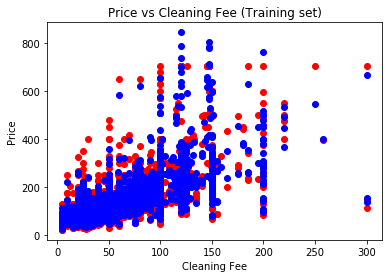

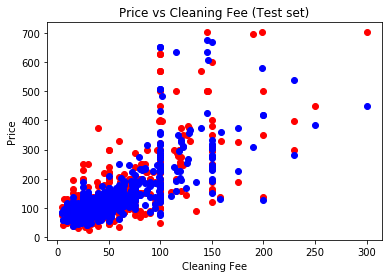

In [169]:
visualising(X_train, X_test, y_train, y_test, cat_y_pred, catboost)

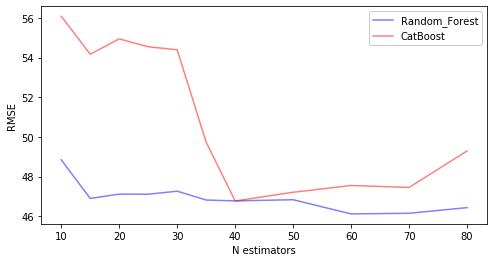

In [39]:
def rf_vs_catboost_n_estimator(X_train, X_test, y_train, y_test, n):
    rmse_rf = []
    rmse_boost = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=i, random_state=10).fit(X_train, y_train)
        catboost = CatBoostRegressor(iterations=i, random_state=10, eval_metric='RMSE', loss_function='RMSE').fit(X_train, y_train,
                                                                                                                 eval_set=(X_test, y_test),
                                                                                                                  logging_level='Silent')
        rmse_rf.append(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(rf.predict(X_test)))))
        rmse_boost.append(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(catboost.predict(X_test)))))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, rmse_rf, alpha=0.5, color='blue', label='Random_Forest')
    ax.plot(n, rmse_boost, alpha=0.5, color='red', label='CatBoost')
    ax.set_ylabel("RMSE")
    ax.set_xlabel("N estimators")
    ax.legend(framealpha=1, frameon=True);
    
rf_vs_catboost_n_estimator(X_train, X_test, y_train, y_test, [10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80])

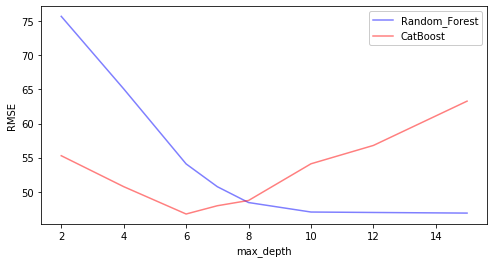

In [40]:
def rf_vs_catboost_max_depth(X_train, X_test, y_train, y_test, n):
    rmse_rf = []
    rmse_boost = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=40, max_depth=i, random_state=10).fit(X_train, y_train)
        catboost = CatBoostRegressor(iterations=40, max_depth=i, random_state=10, eval_metric='RMSE', loss_function='RMSE').fit(X_train, y_train,
                                                                                                                 eval_set=(X_test, y_test),
                                                                                                                  logging_level='Silent')
        rmse_rf.append(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(rf.predict(X_test)))))
        rmse_boost.append(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(catboost.predict(X_test)))))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, rmse_rf, alpha=0.5, color='blue', label='Random_Forest')
    ax.plot(n, rmse_boost, alpha=0.5, color='red', label='CatBoost')
    ax.set_ylabel("RMSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);
    
rf_vs_catboost_max_depth(X_train, X_test, y_train, y_test, [2, 4, 6, 7, 8, 10, 12, 15])

In [172]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)